# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 60311 (delta 32), reused 37 (delta 23), pack-reused 60260
Receiving objects: 100% (60311/60311), 442.46 MiB | 34.69 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Checking out files: 100% (60225/60225), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [ ]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [ ]:
session = tf.Session()

# Predicciones con Word2Vec

In [ ]:
import sys
sys.path.append('/content/tensorflow/scripts/tema08/')

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import nlp_helpers
import nltk
from nltk.corpus import stopwords
import os
import pickle

In [ ]:
embedding_size = 200
vocabulary_size = 2000
batch_size = 100
max_words = 100
nltk.download('stopwords')
stops = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
texts, target = nlp_helpers.load_movies_data()
texts = nlp_helpers.normalize_text(texts, stops)

In [ ]:
target = [target[ix] for ix, x in enumerate(texts) if len(x.split())>2]
texts = [x for x in texts if len(x.split())>2]

In [ ]:
train_idx = np.random.choice(len(target), round(0.8*len(target)), replace=False)
test_idx = np.array(list(set(range(len(target)))-set(train_idx)))

In [ ]:
texts_train = [x for ix, x in enumerate(texts) if ix in train_idx]
texts_test = [x for ix, x in enumerate(texts) if ix in test_idx]
target_train = np.array([x for ix, x in enumerate(target) if ix in train_idx])
target_test = np.array([x for ix, x in enumerate(target) if ix in test_idx])

In [30]:
dict_file = os.path.join("/content/tensorflow/datasets", "movie_vocabulary.pkl")
word_dictionary = pickle.load(open(dict_file, 'rb'))

In [ ]:
word_dictionary

{'john': 266,
 'warmth': 947,
 'details': 1623,
 'motion': 1077,
 'un': 1317,
 'uplifting': 1723,
 'isnt': 47,
 'whole': 172,
 'major': 665,
 'narrative': 216,
 'firsttime': 1307,
 'thanks': 571,
 'barbershop': 1422,
 'fears': 1202,
 'becomes': 236,
 'crude': 1939,
 'fantastic': 1405,
 'needs': 463,
 'female': 640,
 'achievement': 1845,
 'delivering': 1993,
 'score': 1088,
 'quietly': 1058,
 'believe': 335,
 'society': 1131,
 'warm': 475,
 'writing': 434,
 'tasty': 1688,
 'seeing': 385,
 'content': 1645,
 'takes': 127,
 'youd': 560,
 'important': 607,
 'faces': 1945,
 'must': 376,
 'welcome': 616,
 'protagonist': 1574,
 'much': 6,
 'dreary': 1177,
 'arent': 767,
 'power': 245,
 'flicks': 816,
 'glass': 1513,
 'substance': 835,
 'moore': 1931,
 'earth': 1851,
 'pure': 605,
 'banal': 1585,
 'bears': 972,
 'whimsy': 1852,
 'mind': 294,
 'form': 509,
 'killed': 1964,
 'quirky': 287,
 'eventually': 860,
 'weve': 825,
 'running': 501,
 'add': 547,
 'surprising': 487,
 'sloppy': 1484,
 'scrip

In [ ]:
text_data_train = np.array(nlp_helpers.text_to_numbers(texts_train, word_dictionary))
text_data_test = np.array(nlp_helpers.text_to_numbers(texts_test, word_dictionary))

In [ ]:
text_data_train = np.array([x[0:max_words] for x in [y+[0]*max_words for y in text_data_train]])
text_data_test = np.array([x[0:max_words] for x in [y+[0]*max_words for y in text_data_test]])

In [ ]:
A = tf.Variable(tf.random_normal(shape = [embedding_size, 1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

x_data = tf.placeholder(shape = [None, max_words], dtype = tf.int32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

In [ ]:
embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))

In [ ]:
embed = tf.nn.embedding_lookup(embeddings, x_data)
embed_avg = tf.reduce_mean(embed,1)

In [ ]:
model_output = tf.add(tf.matmul(embed_avg, A), b)

In [ ]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [ ]:
my_optim = tf.train.AdagradOptimizer(0.005)
train_step = my_optim.minimize(loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [ ]:
model_checkpoint_path = os.path.join("/content/tensorflow/datasets/", "cbow_movie_embeddings.ckpt")
saver = tf.train.Saver({"embeddings": embeddings})
saver.restore(session, model_checkpoint_path)

INFO:tensorflow:Restoring parameters from /content/tensorflow/datasets/cbow_movie_embeddings.ckpt


In [ ]:
session.run(embeddings)

array([[ 0.47691995, -0.7063197 ,  0.4997867 , ...,  1.2257141 ,
         0.44793314,  0.3869213 ],
       [ 0.09285235, -0.5890758 , -0.8968625 , ..., -0.75183487,
        -0.1856513 ,  0.5376508 ],
       [ 0.70859647, -0.04537868,  0.06115341, ...,  0.1705215 ,
         0.39041996,  0.57622504],
       ...,
       [ 0.67241955,  0.72852874, -0.46823454, ..., -0.3701911 ,
         0.88134   ,  0.99436426],
       [ 0.31050444,  0.1812253 , -0.2252047 , ..., -0.07675552,
         0.20896816, -0.5758445 ],
       [ 0.97421   ,  0.247648  , -0.8632951 , ...,  0.71806765,
        -0.7972245 , -0.6214726 ]], dtype=float32)

In [ ]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []
i_data = []

for i in range(10000):
    rand_idx = np.random.choice(text_data_train.shape[0], size = batch_size)
    rand_x = text_data_train[rand_idx]
    rand_y = np.transpose([target_train[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    if(i+1)%100==0:
        i_data.append(i+1)
        
        train_loss_temp = session.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})
        train_loss.append(train_loss_temp)
        
        test_loss_temp = session.run(loss, feed_dict={x_data: text_data_test, y_target: np.transpose([target_test])})
        test_loss.append(test_loss_temp)
        
        train_acc_temp = session.run(accuracy, feed_dict={x_data: rand_x, y_target:rand_y})
        train_acc.append(train_acc_temp)
        
        test_acc_temp = session.run(accuracy, feed_dict={x_data: text_data_test, y_target: np.transpose([target_test])})
        test_acc.append(test_acc_temp)
        
    if(i+1)%500==0:
        acc_and_loss = [i+1, train_loss_temp, test_loss_temp, train_acc_temp, test_acc_temp]
        acc_and_loss = [np.round(x,3) for x in acc_and_loss]
        print("Paso #{}, Train Loss {}, Test Loss {}. Train Acc {}, Test Acc{}".format(*acc_and_loss))

Paso #500, Train Loss 0.6919999718666077, Test Loss 0.6909999847412109. Train Acc 0.5400000214576721, Test Acc0.5180000066757202
Paso #1000, Train Loss 0.6890000104904175, Test Loss 0.6909999847412109. Train Acc 0.5600000023841858, Test Acc0.5260000228881836
Paso #1500, Train Loss 0.6859999895095825, Test Loss 0.6909999847412109. Train Acc 0.5699999928474426, Test Acc0.5239999890327454
Paso #2000, Train Loss 0.6959999799728394, Test Loss 0.6909999847412109. Train Acc 0.44999998807907104, Test Acc0.5210000276565552
Paso #2500, Train Loss 0.6899999976158142, Test Loss 0.6909999847412109. Train Acc 0.5099999904632568, Test Acc0.5260000228881836
Paso #3000, Train Loss 0.6890000104904175, Test Loss 0.6909999847412109. Train Acc 0.5199999809265137, Test Acc0.5260000228881836
Paso #3500, Train Loss 0.6940000057220459, Test Loss 0.6909999847412109. Train Acc 0.4699999988079071, Test Acc0.5239999890327454
Paso #4000, Train Loss 0.6940000057220459, Test Loss 0.6909999847412109. Train Acc 0.5, Te

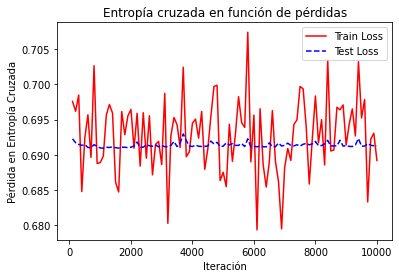

In [ ]:
plt.plot(i_data, train_loss, 'r-', label="Train Loss")
plt.plot(i_data, test_loss, 'b--', label="Test Loss")
plt.title("Entropía cruzada en función de pérdidas")
plt.xlabel("Iteración")
plt.ylabel("Pérdida en Entropía Cruzada")
plt.legend(loc = "upper right")
plt.show()

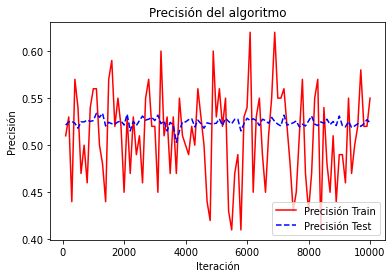

In [ ]:
plt.plot(i_data, train_acc, 'r-', label="Precisión Train")
plt.plot(i_data, test_acc, 'b--', label="Precisión Test")
plt.title("Precisión del algoritmo")
plt.xlabel("Iteración")
plt.ylabel("Precisión")
plt.legend(loc = "lower right")
plt.show()